# (Fordgo bike data exploration)
## by (Hager Sayed)

## Preliminary Wrangling

This document explores a dataset containing the trip data of the fordgo bike.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
import calendar 

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset
the data consists of 183412 rows and 16 columns 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how customers versus subscribers use the service and how the different variables of the dataset relate to this variable

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

user_type,member_birth_year ,member_gender ,duration_sec

In [8]:
df1 = df.copy()

first we will drop the unnecessary columns that will not be needed in our analysis and contains null values

In [9]:
df1.drop(columns=['end_station_id','end_station_name','start_station_name','start_station_id'],inplace=True)

drop rows with null values in member_gender and member_birth_data

In [10]:
df1.dropna(subset=['member_birth_year', 'member_gender'],inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 17.4+ MB


creating member age column from member birth date

In [12]:
df1['member_age'] = 2018-df1['member_birth_year'].astype('int')
df1.drop(columns='member_birth_year',inplace=True)
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59


changing the duration from seconds to hours to make it more interpretable

In [13]:
df1['duration_min']=df1['duration_sec']/60
df1['duration_hours']=df1['duration_min']/60

changing data types 

In [14]:
#changing member_gender and user type to catagorical variables
df1.member_gender=df1.member_gender.astype('category')
df1.user_type=df1.user_type.astype('category')
# changing start and end data to date format
df1.start_time=pd.to_datetime(df1['start_time'])
df1.end_time=pd.to_datetime(df1['end_time'])
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hours
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34,869.750000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29,608.166667,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44,26.416667,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59,29.883333,0.498056


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null category
member_gender              175147 non-null category
bike_share_for_all_trip    175147 non-null object
member_age                 175147 non-null int32
duration_min               175147 non-null float64
duration_hours             175147 non-null float64
dtypes: category(2), datetime64[ns](2), float64(6), int32(1), int64(2), object(1)
memory usage: 17.0+ MB


extracting the day of the week from start date

In [16]:
df1['start_time_month']=df1['start_time'].dt.strftime('%B')
df1['start_time_weekday']=df1['start_time'].dt.strftime('%a')

changing day and month to categories

In [17]:
df1.start_time_month= df1.start_time_month.astype('category')
df1.start_time_weekday = df1.start_time_weekday.astype('category')
df1.head()
df1['start_time_month'].value_counts()

February    175147
Name: start_time_month, dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null category
member_gender              175147 non-null category
bike_share_for_all_trip    175147 non-null object
member_age                 175147 non-null int32
duration_min               175147 non-null float64
duration_hours             175147 non-null float64
start_time_month           175147 non-null category
start_time_weekday         175147 non-null category
dtypes: category(4), datetime64[ns](2), float64(6), int32(1), 

checking that all ages are appropriate

In [19]:
df1['member_age'].max()

140

In [20]:
df1['member_age'].min()

17

the maximum user age is 140 and this is not realistic so we will remove the rows with users older than 90 years old

In [21]:
df_age_abnormal = df1[df1['member_age'] > 90]
df1 = df1.drop(df_age_abnormal.index, axis=0)

In [23]:
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hours,start_time_month,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34,869.750000,14.495833,February,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46,1030.900000,17.181667,February,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29,608.166667,10.136111,February,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44,26.416667,0.440278,February,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59,29.883333,0.498056,February,Thu


## Univariate Exploration


the distribution of members gender using barcharts

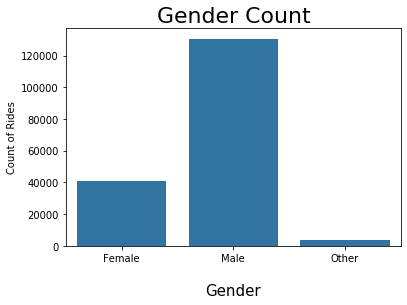

In [62]:
base_color=sb.color_palette()[0]
sb.countplot(data = df1, x = 'member_gender',color=base_color)
plt.title("Gender Count",fontsize=22)
plt.xlabel('Gender',labelpad=20,fontsize=15)
plt.ylabel('Count of Rides');

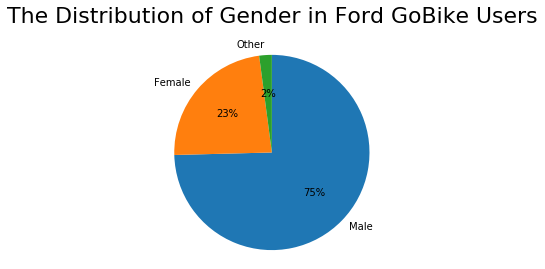

In [63]:
sorted_counts = df1['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of Gender in Ford GoBike Users", fontsize=22, y=1.07)
plt.axis('square');

the percentage of male users is the hieghest as 75% of users are males,23% are females and 2% are others

now we will see the distribution of user types

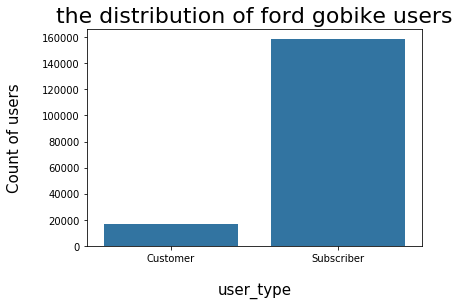

In [71]:
base_color=sb.color_palette()[0]
sb.countplot(data = df1, x = 'user_type',color=base_color)
plt.title("the distribution of ford gobike users",fontsize=22)
plt.xlabel('user_type',labelpad=20,fontsize=15)
plt.ylabel('Count of users',labelpad=20,fontsize=15);

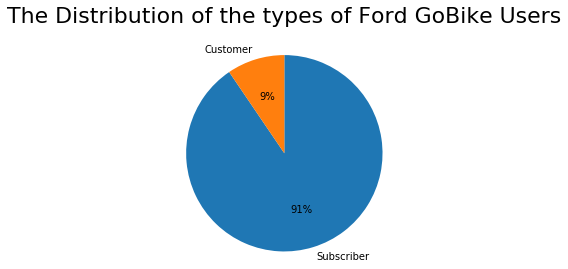

In [69]:
sorted_counts = df1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of the types of Ford GoBike Users", fontsize=22, y=1.07)
plt.axis('square');

from the previous plots the majority of the users are subscribers (91% of users are subscribers and 9% customers)

now we will see the distribution of tha ages of the users

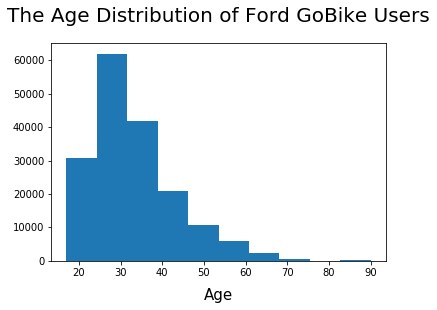

In [35]:
plt.hist(data=df1,x='member_age',color=base_color)
plt.title("The Age Distribution of Ford GoBike Users", fontsize=20,y=1.07)
plt.xlabel("Age", fontsize=15, labelpad=10);

In [36]:
df1.member_age.mean()

33.157336166469605

In [38]:
df1.member_age.describe()

count    175071.000000
mean         33.157336
std           9.967621
min          17.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          90.000000
Name: member_age, dtype: float64

the mean age of the members is 33 years old and number of members decreases as age goes higher

now we will the distribution of the trips duaration in minutes

In [46]:
df1['duration_min'].describe()

count    175071.000000
mean         11.737273
std          27.365603
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

(0, 100)

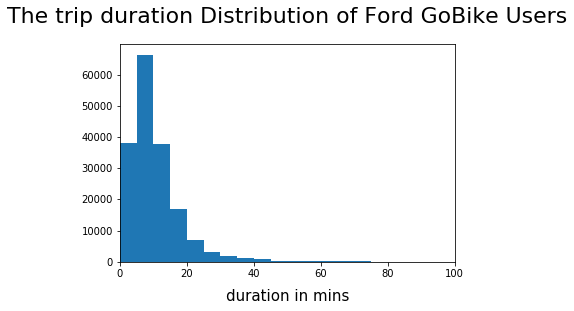

In [72]:
bins = np.arange(0,df1.duration_min.max()+5,5)
plt.hist(data=df1,x='duration_min',color=base_color,bins = bins)
plt.title("The trip duration Distribution of Ford GoBike Users", fontsize=22,y=1.07)
plt.xlabel("duration in mins", fontsize=15, labelpad=10);
plt.xlim((0,100))

from the duaration distribution the majority of the ride are less than 20 minutes and as the duration increases the number of users decreases

the distribution of the rides through different days of the week

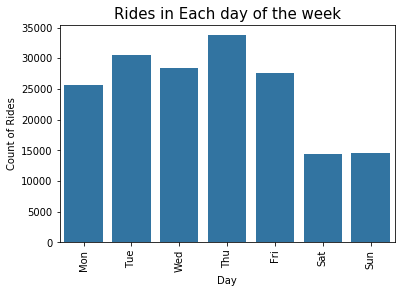

In [74]:
base_color = sb.color_palette()[0]

category_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df1, x = 'start_time_weekday', order = category_order, color = base_color)
plt.title('Rides in Each day of the week', fontsize = 15)
plt.xlabel('Day')
plt.ylabel('Count of Rides')
plt.xticks(rotation = 90);

from the distribution of the rides through the different days of the week the majority of rides are on thursday then tuesday followed by wednesday,friday,monday,saturday and sunday have the least rides 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

This dataset required some cleaning. The cleaning performed earlier included removing some ages that were more than 90 years old (not very likely to be valid),some columns with missing values that was not needed in the analysis and changing data types such as time and date. some feature engineering was performed as new variables were extracted from existing variables such as month ,day of the week and member age so they can be used in the analysis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Some of the birth years were incorrect, as the maximum age was 140 and that did not make much sense. I also removed the data for rows that didn't have gender or an age as they are crucial in the analysis and they can not contain any missing values.

## Bivariate Exploration


(0, 200)

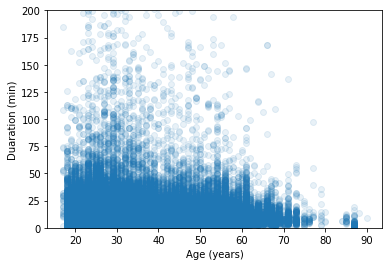

In [100]:
plt.scatter(data=df1,x='member_age',y='duration_min',alpha = 1/10);
plt.xlabel('Age (years)')
plt.ylabel('Duaration (min)')
plt.ylim((0,200))

from the scatter plot most users of different ages ride less than 50 minutes  but some of the few high duration points are mostly in ages less than 60 .there is so many overlapping points so we could try a heat map so we can see the distribution more clearly


In [93]:
df1['duration_min'].describe()

count    175071.000000
mean         11.737273
std          27.365603
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

the relationship between age and duration using heatmap

Text(0, 0.5, 'duration(mins)')

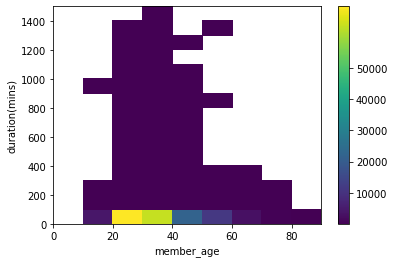

In [78]:
bins_y = np.arange(0, 1500+100, 100)
bins_x = np.arange(0, 90+10, 10)
plt.hist2d(x=df1['member_age'], y=df1['duration_min'],
           bins = [bins_x, bins_y],cmin = 0.5)
plt.colorbar(ticks=[0,10000, 20000, 30000, 40000,50000])
plt.xlabel('member_age')
plt.ylabel('duration(mins)')

In [ ]:
the relationship between age and duration using pointplot

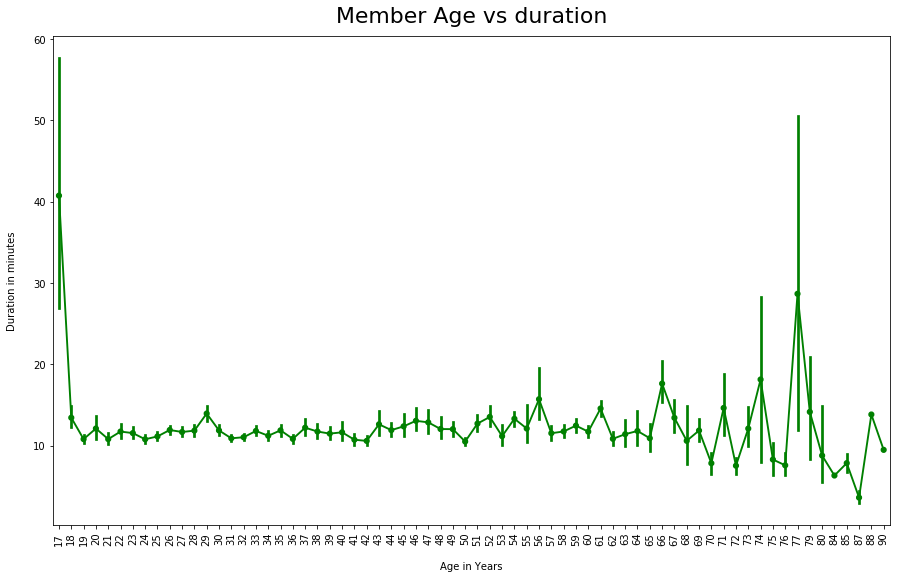

In [80]:
plt.figure(figsize=(15,9))
sb.pointplot(data = df1, x='member_age', y='duration_min', scale=.7, color='green')
plt.title('Member Age vs duration', fontsize=22, y=1.015)
plt.xlabel('Age in Years', labelpad=16)
plt.ylabel('Duration in minutes', labelpad=16)
plt.xticks(rotation = 90);

from the scatter plot and heat map  we can say that most frequent users of bikes are aged between 20 and 40. mostly Higher durations are clocked by younger members. 

studying the  usage of different types of customers during the week


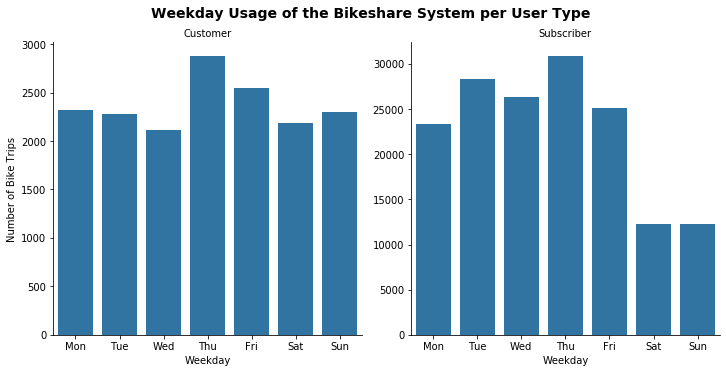

In [39]:
base_color= sb.color_palette()[0]
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df1, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = cat_order, color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');


both customers and users use the bikes the most on thursday but on saturday and sunday subscribers usage rate is much less than 
users but for most of the remaining days there is no much difference

the relationship between user_type and duration

(0, 200)

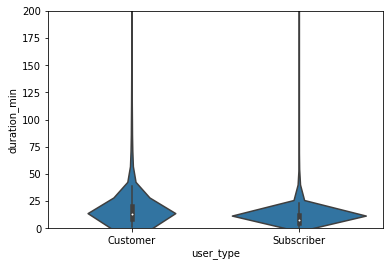

In [56]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df1, x = 'user_type', y = 'duration_min',color = base_color)
plt.ylim((0,200))
# plt.xticks(rotation = 15)

(0, 200)

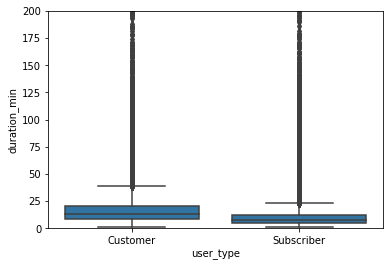

In [81]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df1, x = 'user_type', y = 'duration_min',color = base_color)
plt.ylim((0,200))
# plt.xticks(rotation = 15)

from the violin plot  a larger percentage of customers are taking longer rides duration compared to subscripers 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

after seeing the relationship between user type and trip durations customers occupy higher duration than subscribers,also after analuzing the usage of different user types over the weekdays , on weekends(satuerday and sunday) they are occupied with a bigger number of customesr compared to subscribers .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

yes,i analyzed the relationship between the duration and the age and obviously younger members occupy the higher trips duration compared to members over 60 years old

In [43]:
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hours,start_time_month,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34,869.750000,14.495833,February,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46,1030.900000,17.181667,February,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29,608.166667,10.136111,February,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44,26.416667,0.440278,February,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59,29.883333,0.498056,February,Thu


## Multivariate Exploration

the relationship between member age , gender and the duarion of the trip

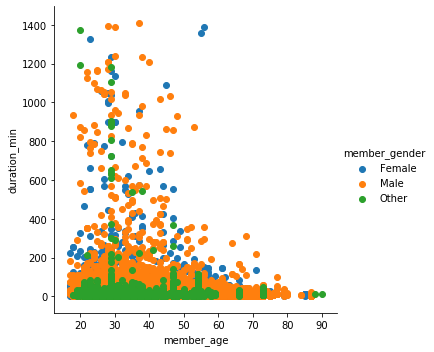

In [47]:
g =sb.FacetGrid(data =df1,hue = 'member_gender',size = 5)
g.map(plt.scatter,'member_age','duration_min')
g.add_legend()

from the scatter plot we can tell that higher duration are occupied by ages mostly less than 60 and there is no obvious effect on duration based on gender

we can create a seperate plots for each gender type to see the distribution more clearly

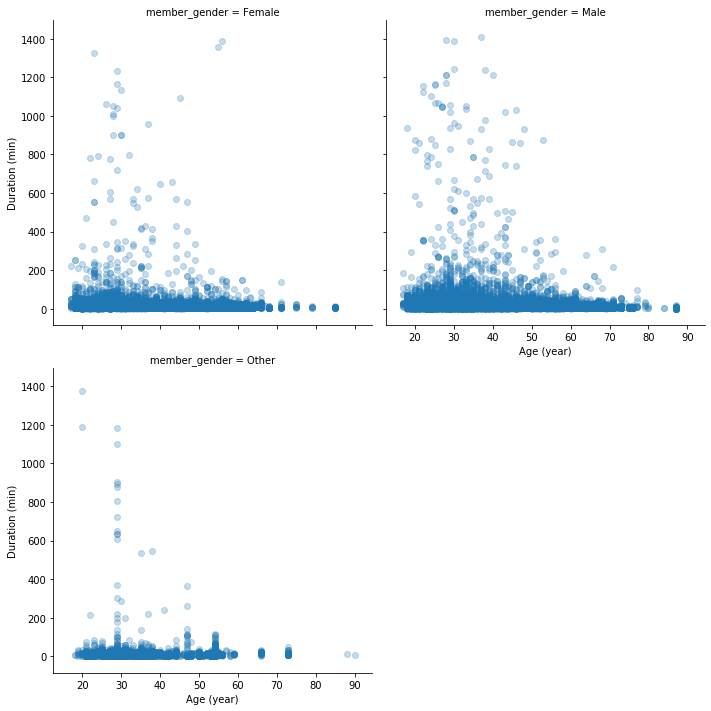

In [51]:
genders = sb.FacetGrid(data = df1, col = 'member_gender', col_wrap = 2, size = 5)
genders.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (min)')

the grid plot still supports the previous observation that gender has no effect on the duration of the rides

analyze the distributions between customer and subscriber, based on gender and weekday usage.

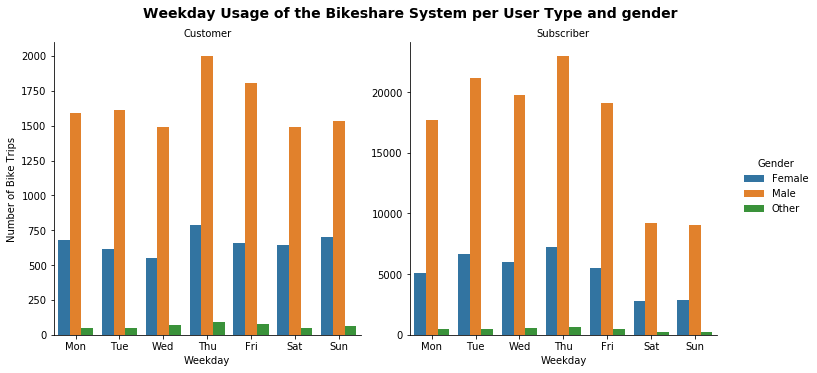

In [54]:

cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df1, x='start_time_weekday', col="user_type",hue='member_gender', kind='count', sharey = False, order = cat_order)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type and gender', y=1.03, fontsize=14, fontweight='semibold');
g._legend.set_title('Gender')

While there is less female and other gender usage than male as a natural result for the higher number of males in the program, the trend between customers and subscribers of each gender is similar. Customers of all genders use the service more often on the weekends, while subscribers use the system during the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

the main features that we discovered in this part were the duration of the trip ,member gender,member age and user type,The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday, the most. This was not influenced by gender.The multivariate charts reinforced the earlier relationships that were observed. The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on Monday-Friday.gender almost has no effect on the data

### Were there any interesting or surprising interactions between features?
some of the heighst durations is of users at age of about 60 years old 

in conclusion ,  regarding our feature of interest(user_type) most of our users are subscribers ,
The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on weekdays,
customers take longer rides duaration than subscribers 
gender almost has no effect on the data compared to age and user_type

In [8]:
!jupyter nbconvert goford_bike-Copy1.ipynb --to slides --no-input

[NbConvertApp] Converting notebook goford_bike-Copy1.ipynb to slides
[NbConvertApp] Writing 556693 bytes to goford_bike-Copy1.slides.html
